In [1]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.1, random_state=101)

In [4]:
X_train.shape, y_train.shape

((45000, 32, 32, 3), (45000, 1))

In [5]:
X_valid.shape, y_valid.shape

((5000, 32, 32, 3), (5000, 1))

In [6]:
X_test.shape, y_test.shape


((10000, 32, 32, 3), (10000, 1))

In [7]:
class_names = ['airplane', 'automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']

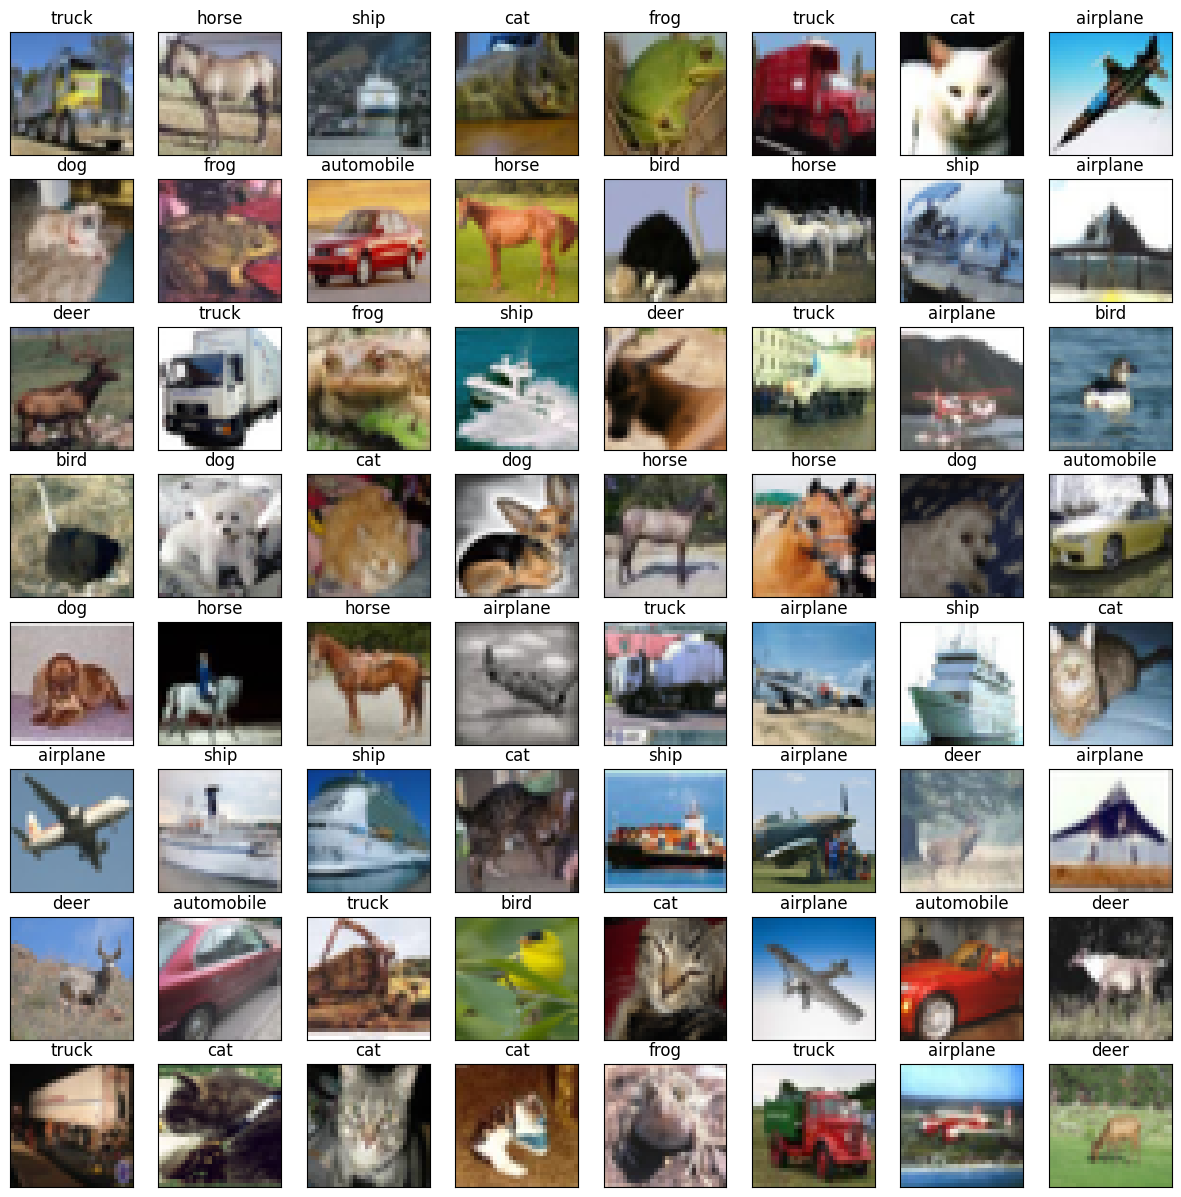

In [8]:
plt.figure(figsize=(15,15))
for i in range(64):
  plt.subplot(8,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i])
  plt.title(class_names[y_train[i][0]])

plt.show()

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_valid = X_valid.astype('float32')

mean = np.mean(X_train)
std = np.std(X_train)

X_train = (X_train-mean)/(std+.00000001)
X_test = (X_test-mean)/(std+.00000001)
X_valid = (X_valid-mean)/(std+.00000001)


In [10]:
y_train = to_categorical(y_train,10)
y_valid = to_categorical(y_valid,10)
y_test = to_categorical(y_test,10)


In [11]:
data_generator = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = .12,
    height_shift_range = 0.12,
    horizontal_flip =True,
    zoom_range = 0.1,
    brightness_range = [0.9,1.1],
    shear_range = 10,
    channel_shift_range = 0.1
)

In [12]:
model = Sequential()

weight_decay =

model.add(Conv2D(filters=32, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay), input_shape = X_train.shape[1:]))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.2))



model.add(Conv2D(filters=64, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.3))


model.add(Conv2D(filters=128, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.4))


model.add(Conv2D(filters=256, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), padding='same', activation = 'relu', kernel_regularizer =l2(weight_decay)))
model.add(BatchNormalization())



model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.5))



model.add(Flatten())


model.add(Dense(10,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.save("fliktai.h5")


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,186,346 (4.53 MB)

 Trainable params: 1,184,426 (4.52 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
batch_size =64

epochs = 10

optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience = 10, min_lr = .00001)

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 40, restore_best_weights=True, verbose=1)

model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_valid, y_valid),
                              callbacks = [reduce_lr, early_stopping],
                              verbose=2)

Epoch 1/10
704/704 - 634s - 901ms/step - accuracy: 0.7001 - loss: 0.9975 - val_accuracy: 0.7596 - val_loss: 0.8042 - learning_rate: 5.0000e-04
Epoch 2/10
704/704 - 613s - 871ms/step - accuracy: 0.7166 - loss: 0.9614 - val_accuracy: 0.7556 - val_loss: 0.8718 - learning_rate: 5.0000e-04
Epoch 3/10
704/704 - 608s - 864ms/step - accuracy: 0.7304 - loss: 0.9275 - val_accuracy: 0.7700 - val_loss: 0.8238 - learning_rate: 5.0000e-04
Epoch 4/10
704/704 - 612s - 870ms/step - accuracy: 0.7388 - loss: 0.9133 - val_accuracy: 0.7910 - val_loss: 0.7711 - learning_rate: 5.0000e-04
Epoch 5/10
704/704 - 609s - 865ms/step - accuracy: 0.7469 - loss: 0.8962 - val_accuracy: 0.7806 - val_loss: 0.8046 - learning_rate: 5.0000e-04
Epoch 6/10
704/704 - 624s - 886ms/step - accuracy: 0.7554 - loss: 0.8761 - val_accuracy: 0.7970 - val_loss: 0.7459 - learning_rate: 5.0000e-04
Epoch 7/10
704/704 - 640s - 909ms/step - accuracy: 0.7574 - loss: 0.8726 - val_accuracy: 0.8076 - val_loss: 0.7537 - learning_rate: 5.0000e-04

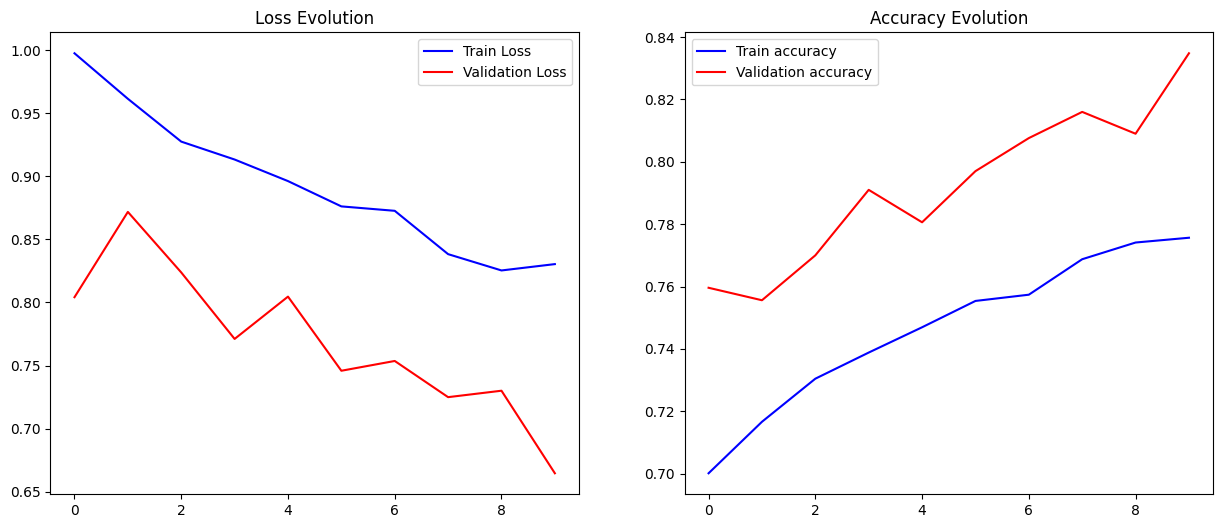

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(model.history.history['loss'], label = 'Train Loss', color = 'blue')
plt.plot(model.history.history['val_loss'], label = 'Validation Loss', color = 'red')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(1,2,2)
plt.plot(model.history.history['accuracy'], label = 'Train accuracy', color = 'blue')
plt.plot(model.history.history['val_accuracy'], label = 'Validation accuracy', color = 'red')
plt.legend()
plt.title('Accuracy Evolution')

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose = 1)

print(f'Test Accuracy : {test_acc}\nTestLoss: {test_loss}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.8152 - loss: 0.7037
Test Accuracy : 0.8162999749183655
TestLoss: 0.7030190229415894


In [ ]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSq2O4qf2vIH6qsxCln2H2NlAV02riDUhzMNg&s'
reps = urllib.request.urlopen(url)
image = np.asarray(bytearray(reps.read()),dtype='uint8')
image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

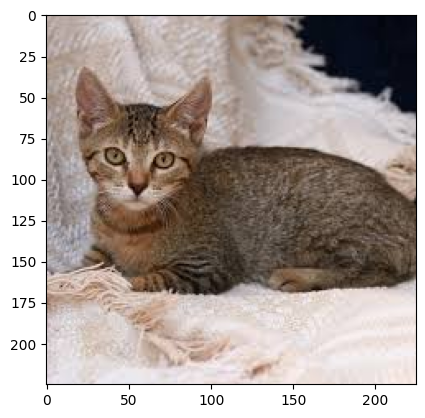

In [ ]:
plt.imshow(image)
plt.show()

In [ ]:
image = cv2.resize(image, (32,32))
image = (image-mean)/(std+0.000001)
image = image.reshape((1,32,32,3))


In [ ]:
predict = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [ ]:
predict
print(f'The predicted class: {class_names[predict.argmax()]}')

The predicted class: cat
